In [1]:
!pip install matplotlib

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Nos últimos anos, as redes sociais se tornaram parte integrante da vida cotidiana, influenciando a maneira como as pessoas se conectam, consomem informações e se entretêm. Com o crescimento exponencial dessas plataformas, é essencial entender como os usuários interagem com elas e, em particular, o tempo que dedicam a essas atividades.

#### Nesta análise, investigamos o tempo médio gasto em redes sociais em diferentes países e entre diversas faixas etárias e perfis profissionais. O objetivo é identificar padrões de comportamento, como as plataformas mais populares entre diferentes grupos demográficos e quais fatores podem estar correlacionados com o uso excessivo dessas redes. Além disso, buscamos compreender como esse tempo médio varia em função da profissão, idade, e do nível de satisfação pessoal reportado pelos usuários.

#### Com essa análise, pretendemos trazer insights sobre o impacto das redes sociais na produtividade e no bem-estar dos usuários, fornecendo uma visão clara das tendências globais de uso e como elas podem ser aproveitadas ou moderadas em contextos pessoais e profissionais.



In [3]:
df_SocialMedia = pd.read_csv('./Time-Wasters on Social Media.csv')



In [4]:
df_SocialMedia.shape

(1000, 31)

### Visualização de uma amostra do material


In [5]:
df_SocialMedia.head()


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


 # DESCRIÇÃO DAS COLUNAS:

- UserID: Identificador único atribuído a cada usuário.
- Age: Idade do usuário.
- Gender: Gênero do usuário (por exemplo, masculino, feminino, não-binário).
- Location: Localização geográfica do usuário.
- Income: Nível de renda do usuário.
- Debt: Quantidade de dívida que o usuário possui.
- Owns Property: Indica se o usuário possui propriedade.
- Profession: Ocupação ou profissão do usuário.
- Demographics: Dados estatísticos sobre o usuário (por exemplo, idade, gênero, renda).
- Platform: Plataforma que o usuário está utilizando (por exemplo, website, aplicativo móvel).
- Total Time Spent: Tempo total que o usuário passa na plataforma.
- Number of Sessions: Número de vezes que o usuário se conectou à plataforma.
- Video ID: Identificador único de um vídeo.
- Video Category: Categoria ou gênero do vídeo.
- Video Length: Duração do vídeo.
- Engagement: Interação do usuário com o vídeo (por exemplo, curtidas, comentários, compartilhamentos).
- Importance Score: Pontuação que indica a importância do vídeo para o usuário.
- Time Spent On Video: Tempo que o usuário passa assistindo a um vídeo.
- Number of Videos Watched: Número total de vídeos assistidos pelo usuário.
- Scroll Rate: Taxa com que o usuário rola o conteúdo.
- Frequency: Com que frequência o usuário interage com a plataforma.
- Productivity Loss: Impacto do uso da plataforma na produtividade do usuário.
- Satisfaction: Nível de satisfação do usuário com a plataforma ou conteúdo.
- Watch Reason: Motivo pelo qual o usuário está assistindo a um vídeo (por exemplo, entretenimento, educação).
- Device Type: Tipo de dispositivo que o usuário está utilizando (por exemplo, smartphone, tablet, desktop).
- OS: Sistema operacional do dispositivo do usuário (por exemplo, iOS, Android, Windows).
- Watch Time: Horário do dia em que o usuário assiste a vídeos.
- Self Control: Capacidade do usuário de controlar o uso da plataforma.
- Addiction Level: Nível de dependência do usuário em relação à plataforma.
- Current Activity: O que o usuário está fazendo enquanto assiste ao vídeo.
- Connection Type: Tipo de conexão de internet que o usuário possui (por exemplo, Wi-Fi, celular).

In [6]:

filtro = df_SocialMedia[df_SocialMedia['Location'] == 'Barzil']

print(filtro)

     UserID  Age  Gender Location  Income   Debt  Owns Property  \
3         4   60    Male   Barzil   62963   True          False   
7         8   36    Male   Barzil   39715  False          False   
17       18   19  Female   Barzil   37069  False          False   
21       22   55    Male   Barzil   27710  False          False   
38       39   24    Male   Barzil   52591   True           True   
..      ...  ...     ...      ...     ...    ...            ...   
919     920   64  Female   Barzil   71813   True           True   
926     927   36  Female   Barzil   35193  False          False   
950     951   57    Male   Barzil   81240   True           True   
952     953   53  Female   Barzil   26155  False          False   
974     975   43  Female   Barzil   53870   True           True   

        Profession Demographics   Platform  ...  ProductivityLoss  \
3    Waiting staff        Rural    YouTube  ...                 3   
7         Engineer        Rural  Instagram  ...          

- Corrigindo

In [7]:

df_SocialMedia['Location'] = df_SocialMedia['Location'].replace('Barzil', 'Brazil')


print(df_SocialMedia)

     UserID  Age  Gender       Location  Income   Debt  Owns Property  \
0         1   56    Male       Pakistan   82812   True           True   
1         2   46  Female         Mexico   27999  False           True   
2         3   32  Female  United States   42436  False           True   
3         4   60    Male         Brazil   62963   True          False   
4         5   25    Male       Pakistan   22096  False           True   
..      ...  ...     ...            ...     ...    ...            ...   
995     996   22    Male          India   74254   True           True   
996     997   40  Female       Pakistan   27006  False          False   
997     998   27    Male          India   94218   True           True   
998     999   61    Male       Pakistan   85344   True          False   
999    1000   19    Male          India   53840   True           True   

        Profession Demographics   Platform  ...  ProductivityLoss  \
0         Engineer        Rural  Instagram  ...       

In [8]:
df_SocialMedia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

- Verificar se existe valores nulos

In [9]:
df_SocialMedia.isnull().sum()

UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

- Descrição dos recursos categóricos

In [10]:
df_SocialMedia.describe(include='object').T

,count,unique,top,freq
Gender,1000,3,Male,514
Location,1000,10,India,228
Profession,1000,9,Students,246
Demographics,1000,2,Rural,746
Platform,1000,4,TikTok,273
Video Category,1000,9,Jokes/Memes,179
Frequency,1000,4,Evening,365
Watch Reason,1000,4,Habit,339
DeviceType,1000,3,Smartphone,585
OS,1000,4,Android,500


- **count**: O número total de entradas não nulas.
- **unique**: O número de valores únicos na coluna.
- **top**: O valor mais frequente (moda).
- **freq**: A frequência do valor mais frequente.

- Verifica se existe linhas duplicadas

In [11]:
df_SocialMedia.duplicated().sum()

np.int64(0)

Não existem linhas duplicadas. 

- Contagem de valores unicos

In [12]:
df_SocialMedia.nunique()

UserID                      1000
Age                           47
Gender                         3
Location                      10
Income                       996
Debt                           2
Owns Property                  2
Profession                     9
Demographics                   2
Platform                       4
Total Time Spent             278
Number of Sessions            19
Video ID                     947
Video Category                 9
Video Length                  29
Engagement                   953
Importance Score               9
Time Spent On Video           29
Number of Videos Watched      49
Scroll Rate                   99
Frequency                      4
ProductivityLoss               9
Satisfaction                   9
Watch Reason                   4
DeviceType                     3
OS                             4
Watch Time                    16
Self Control                   8
Addiction Level                8
CurrentActivity                4
Connection

- Tempo medio gasto por faixa etaria

In [13]:
df_SocialMedia.groupby('Age')['Total Time Spent'] .mean().sort_values(ascending=False)

Age
37    183.500000
26    179.888889
62    179.080000
46    175.894737
21    173.052632
45    171.600000
35    170.812500
24    170.285714
23    169.956522
58    169.500000
27    164.666667
25    162.043478
54    161.296296
59    160.058824
20    159.583333
60    159.000000
39    156.727273
51    156.722222
53    156.260870
61    154.913043
64    154.666667
30    154.555556
55    154.437500
42    154.000000
47    151.809524
19    151.166667
22    146.480000
18    145.600000
38    145.210526
57    145.000000
41    145.000000
48    144.187500
43    144.000000
40    143.166667
52    141.321429
29    140.454545
28    139.200000
50    138.366667
49    138.120000
44    137.187500
34    135.681818
33    133.476190
63    131.615385
31    129.000000
36    119.600000
56    119.000000
32    114.888889
Name: Total Time Spent, dtype: float64

- Tempo médio gasto na plataforma pelo usuário

In [14]:
df_SocialMedia.groupby(['Platform'])['Total Time Spent'] .mean().sort_values(ascending=False)

Platform
Facebook     155.180995
YouTube      152.820000
TikTok       151.271062
Instagram    146.910156
Name: Total Time Spent, dtype: float64

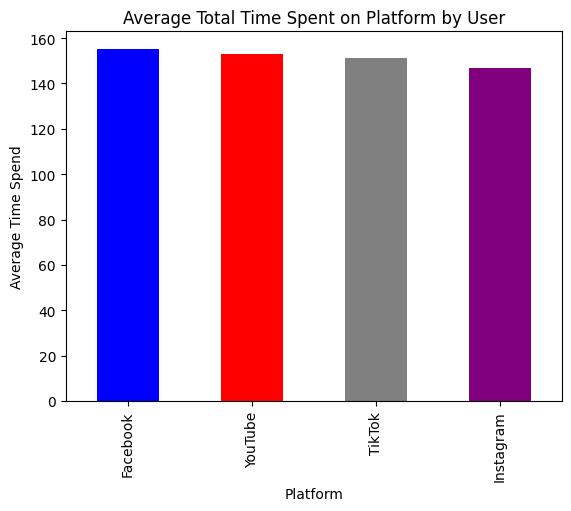

In [15]:
df_SocialMedia.groupby(['Platform'])['Total Time Spent'].mean().sort_values(ascending=False).plot(kind='bar',color= ['blue', 'red', 'grey', 'purple'])
plt.title('Average Total Time Spent on Platform by User')
plt.ylabel('Average Time Spend');

- Verificando os países


In [16]:
location = df_SocialMedia.groupby(['Location']).size().reset_index(name='Counts')

print(location)

        Location  Counts
0         Brazil      78
1        Germany      59
2          India     228
3      Indonesia      77
4          Japan      75
5         Mexico      73
6       Pakistan      76
7    Philippines      78
8  United States     174
9        Vietnam      82


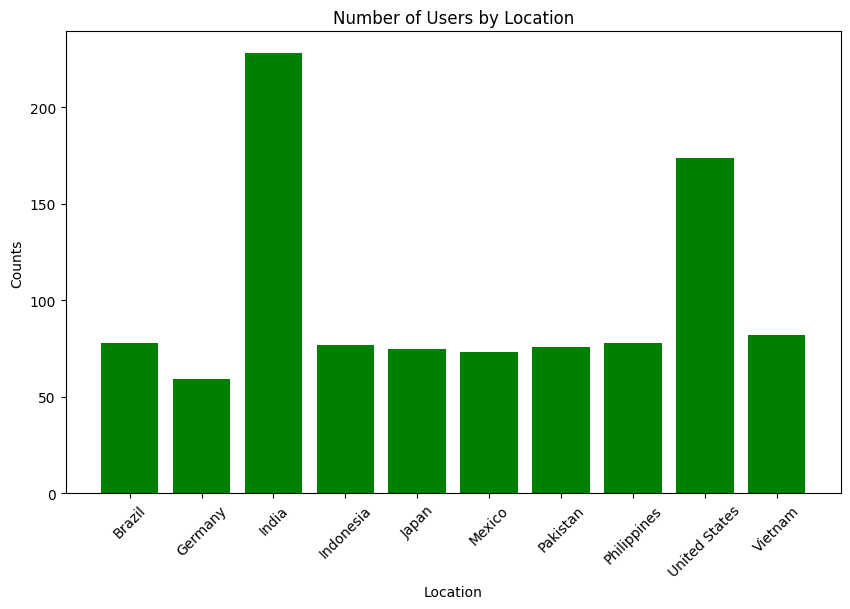

In [17]:
plt.figure(figsize=(10, 6))  
plt.bar(location['Location'], location['Counts'], color='green')
plt.xlabel('Location')
plt.ylabel('Counts')
plt.title('Number of Users by Location')
plt.xticks(rotation=45) 
plt.show()

- Média de idade de usuarios de cada plataforma por cada país:

In [18]:

age_platform_summary = df_SocialMedia.groupby(['Location', 'Platform'])['Age'].mean().reset_index()


age_platform_summary.rename(columns={'Age': 'Average Age'}, inplace=True)

print(age_platform_summary)

         Location   Platform  Average Age
0          Brazil   Facebook    42.263158
1          Brazil  Instagram    41.090909
2          Brazil     TikTok    44.090909
3          Brazil    YouTube    47.200000
4         Germany   Facebook    33.500000
5         Germany  Instagram    39.555556
6         Germany     TikTok    45.692308
7         Germany    YouTube    43.500000
8           India   Facebook    38.893617
9           India  Instagram    41.745098
10          India     TikTok    40.291667
11          India    YouTube    39.741379
12      Indonesia   Facebook    36.428571
13      Indonesia  Instagram    37.473684
14      Indonesia     TikTok    38.571429
15      Indonesia    YouTube    38.300000
16          Japan   Facebook    40.466667
17          Japan  Instagram    40.000000
18          Japan     TikTok    38.708333
19          Japan    YouTube    40.888889
20         Mexico   Facebook    44.000000
21         Mexico  Instagram    43.461538
22         Mexico     TikTok    43

- Media de tempo gasto em cada plataforma

In [20]:
filtro_brazil = df_SocialMedia[df_SocialMedia['Location'] == 'Brazil']

print(filtro_brazil)

     UserID  Age  Gender Location  Income   Debt  Owns Property  \
3         4   60    Male   Brazil   62963   True          False   
7         8   36    Male   Brazil   39715  False          False   
17       18   19  Female   Brazil   37069  False          False   
21       22   55    Male   Brazil   27710  False          False   
38       39   24    Male   Brazil   52591   True           True   
..      ...  ...     ...      ...     ...    ...            ...   
919     920   64  Female   Brazil   71813   True           True   
926     927   36  Female   Brazil   35193  False          False   
950     951   57    Male   Brazil   81240   True           True   
952     953   53  Female   Brazil   26155  False          False   
974     975   43  Female   Brazil   53870   True           True   

        Profession Demographics   Platform  ...  ProductivityLoss  \
3    Waiting staff        Rural    YouTube  ...                 3   
7         Engineer        Rural  Instagram  ...          

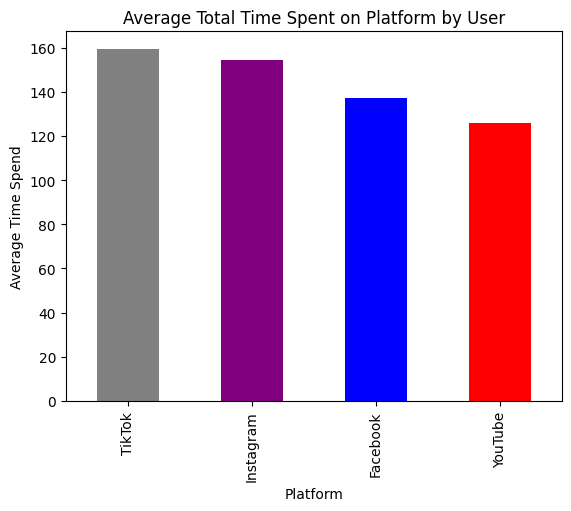

In [21]:
filtro_brazil.groupby(['Platform'])['Total Time Spent'].mean().sort_values(ascending=False).plot(kind='bar',color= ['grey', 'purple', 'blue', 'red'])
plt.title('Average Total Time Spent on Platform by User')
plt.ylabel('Average Time Spend');

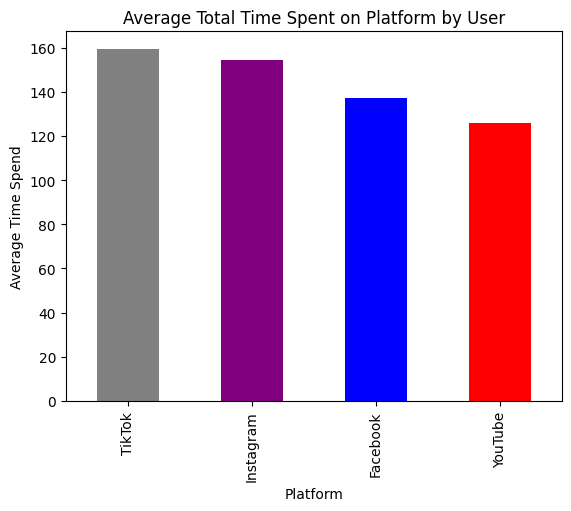

In [22]:
filtro_brazil.groupby(['Platform'])['Total Time Spent'].mean().sort_values(ascending=False).plot(kind='bar',color= ['grey', 'purple', 'blue', 'red'])
plt.title('Average Total Time Spent on Platform by User')
plt.ylabel('Average Time Spend');

In [23]:

filtro_india = df_SocialMedia[df_SocialMedia['Location'] == 'India']

print(filtro_india)

     UserID  Age  Gender Location  Income   Debt  Owns Property  \
6         7   56    Male    India   46201  False          False   
20       21   47    Male    India   27736  False          False   
23       24   38  Female    India   33975  False          False   
28       29   42  Female    India   94603   True           True   
29       30   44    Male    India   57481   True          False   
..      ...  ...     ...      ...     ...    ...            ...   
990     991   60  Female    India   97240   True           True   
993     994   23  Female    India   75751   True           True   
995     996   22    Male    India   74254   True           True   
997     998   27    Male    India   94218   True           True   
999    1000   19    Male    India   53840   True           True   

        Profession Demographics  Platform  ...  ProductivityLoss  \
6         Students        Rural    TikTok  ...                 8   
20   Waiting staff        Rural   YouTube  ...             

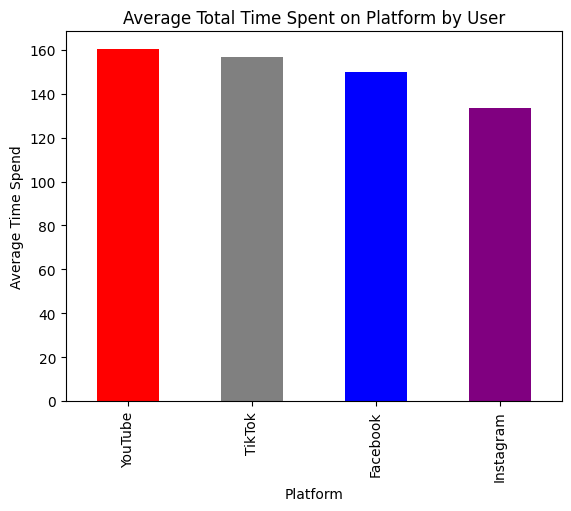

In [24]:
filtro_india.groupby(['Platform'])['Total Time Spent'].mean().sort_values(ascending=False).plot(kind='bar',color= ['red', 'grey', 'blue', 'purple'])
plt.title('Average Total Time Spent on Platform by User')
plt.ylabel('Average Time Spend');

In [25]:

filtro_Eua = df_SocialMedia[df_SocialMedia['Location'] == 'United States']

print(filtro_Eua)

     UserID  Age  Gender       Location  Income   Debt  Owns Property  \
2         3   32  Female  United States   42436  False           True   
8         9   40    Male  United States   49309  False          False   
9        10   28   Other  United States   35078  False          False   
19       20   61    Male  United States   57051   True           True   
30       31   59    Male  United States   29557  False           True   
..      ...  ...     ...            ...     ...    ...            ...   
968     969   25  Female  United States   31308  False          False   
969     970   43  Female  United States   82522   True           True   
977     978   37    Male  United States   41607  False          False   
979     980   37  Female  United States   31908  False          False   
994     995   27    Male  United States   98915   True          False   

        Profession Demographics   Platform  ...  ProductivityLoss  \
2         Engineer        Rural   Facebook  ...       

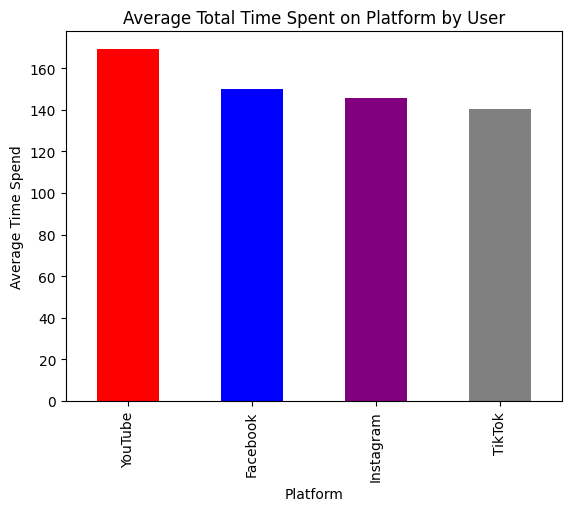

In [26]:
filtro_Eua.groupby(['Platform'])['Total Time Spent'].mean().sort_values(ascending=False).plot(kind='bar',color= ['red', 'blue', 'purple', 'grey'])
plt.title('Average Total Time Spent on Platform by User')
plt.ylabel('Average Time Spend');

<Figure size 1000x600 with 0 Axes>

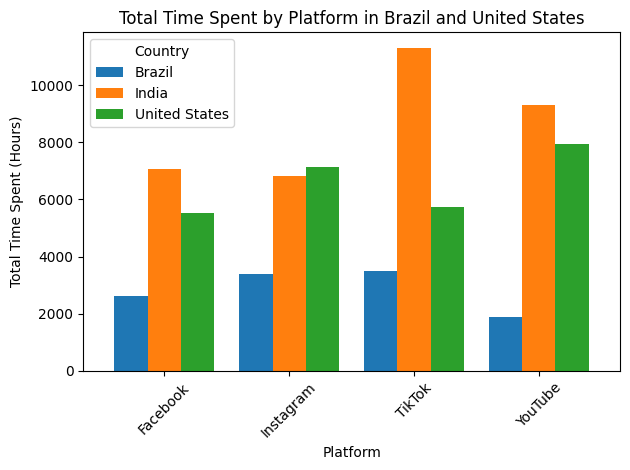

None


In [32]:
total_time_per_platform = df_SocialMedia.groupby(['Platform','Location'])['Total Time Spent'].sum().reset_index()
filtered_data = total_time_per_platform[total_time_per_platform['Location'].isin(['Brazil', 'United States','India'])]
pivot_data = filtered_data.pivot(index='Platform', columns='Location', values='Total Time Spent').fillna(0)


plt.figure(figsize=(10, 6))


pivot_data.plot(kind='bar', width=0.8)

plt.title('Total Time Spent by Platform in Brazil and United States')
plt.xlabel('Platform')
plt.ylabel('Total Time Spent (Hours)')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()


print(plt.show())

<Figure size 1000x600 with 0 Axes>

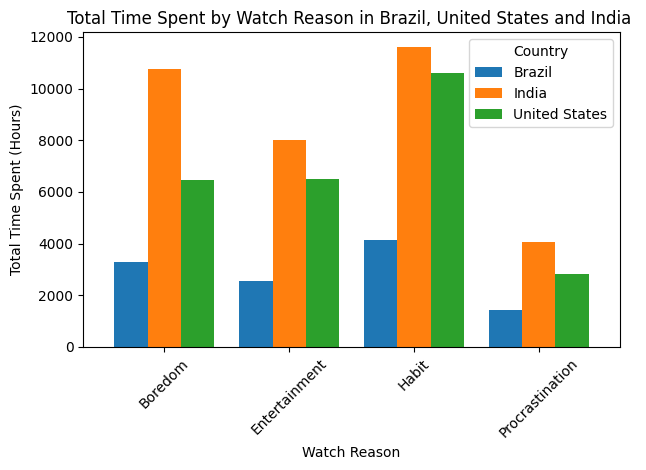

In [33]:
total_time_per_reason = df_SocialMedia.groupby(['Watch Reason','Location'])['Total Time Spent'].sum().reset_index()


filtered_data = total_time_per_reason[total_time_per_reason['Location'].isin(['Brazil', 'United States','India'])]


pivot_data = filtered_data.pivot(index='Watch Reason', columns='Location', values='Total Time Spent').fillna(0)

plt.figure(figsize=(10, 6))


pivot_data.plot(kind='bar', width=0.8)

plt.title('Total Time Spent by Watch Reason in Brazil, United States and India ')
plt.xlabel('Watch Reason')
plt.ylabel('Total Time Spent (Hours)')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()

plt.show()